# get the contact EBs from both the Kepler and K2 catalogs.

In [2]:
pwd

'/home/luke/Dropbox/proj/cbp/notebooks'

In [3]:
ls

debinfo_170129.csv    k2varcat_wrangle.ipynb   plots/
debpaths.csv          kepler_eb_catalog.ipynb  precision_comparison.ipynb
hatdat_170130.csv     lightcurve-work.ipynb    weirdpaths.csv
hat_eb_catalog.ipynb  nb-data/


In [4]:
ls ../data/

all_kepler_cbps.csv
all_kepler_cbps.ods
k2varcat_k2_lightcurve_c00-c04_kepler_v2_catalog.csv
kepler_eb_catalog_v3.csv
kepler_eb_catalog_v3_spec.csv
welsh_overview.pdf


In [5]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline

k2vars = pd.read_csv('../data/k2varcat_k2_lightcurve_c00-c04_kepler_v2_catalog.csv')


In [11]:
k2vars.columns

Index(['# ID', ' Campaign', ' Class', ' Class Probs (DSCUT', ' EA', ' EB',
       ' GDOR', ' Noise', ' OTHPER', ' RRab)', ' Anomaly Score'],
      dtype='object')

In [12]:
classes = np.unique(k2vars[' Class'])
classes

array(['    EA', '    EB', '  GDOR', '  RRab', ' DSCUT', ' Noise', 'OTHPER'], dtype=object)

Note that γ Doradus is a recently defined (Kaye et al. 1999) variable star class. It shows a beat in its pulsation amplitude -- I think I've seen some of these in the HAT data. It's pretty spread out over the pulsation made. For semidetached and contact binaries, that's `EB` in these classes (Armstrong et al. 2016).

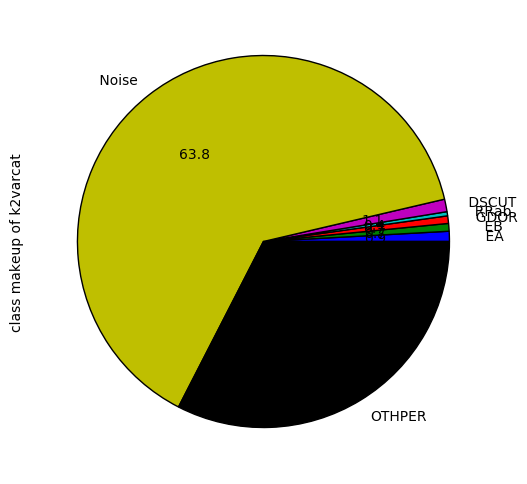

In [19]:
split = []
for c in classes:
    split.append(len(k2vars[k2vars[' Class'] == c])/float(len(k2vars)) )
    
df = pd.Series(np.array(split)*len(k2vars), index=classes, name='class makeup of k2varcat')
df.plot.pie(figsize=(6, 6), autopct='%.1f');

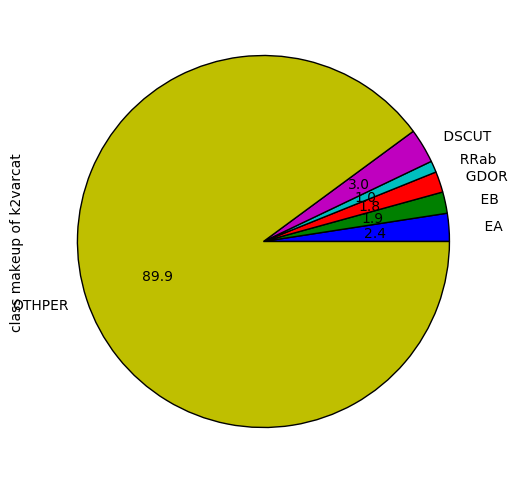

In [21]:
split = []
for c in classes:
    if c == ' Noise':
        continue
    split.append(len(k2vars[k2vars[' Class'] == c])/float(len(k2vars)) )
    
df = pd.Series(np.array(split)*len(k2vars), index=classes[classes != ' Noise'], name='class makeup of k2varcat')
df.plot.pie(figsize=(6, 6), autopct='%.1f');

In [22]:
np.array(split)*len(k2vars)

array([   607.,    463.,    451.,    248.,    750.,  22428.])

In [23]:
classes

array(['    EA', '    EB', '  GDOR', '  RRab', ' DSCUT', ' Noise', 'OTHPER'], dtype=object)

""154 ab-type RR Lyraes (10 newly discovered), 377 δ Scuti pulsators, 133 γ Doradus pulsators, 183 detached eclipsing binaries, 290 semidetached or contact eclipsing binaries and 9399 other periodic (mostly spot-modulated) sources, once class significance cuts are taken into account""

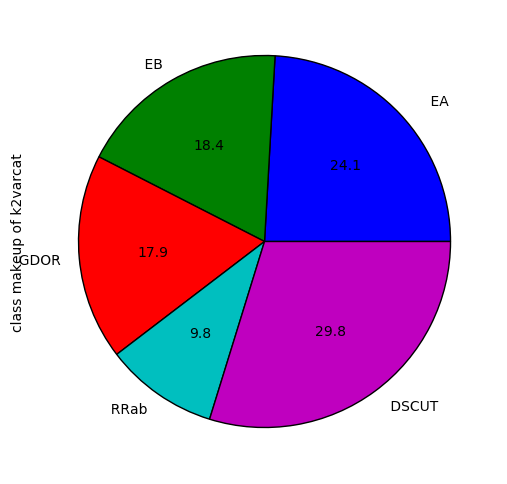

In [27]:
split = []
for c in classes:
    if c == ' Noise' or c == 'OTHPER':
        continue
    split.append(len(k2vars[k2vars[' Class'] == c])/float(len(k2vars)) )
    
df = pd.Series(np.array(split)*len(k2vars), index=classes[(classes != ' Noise') & (classes != 'OTHPER')], name='class makeup of k2varcat')
df.plot.pie(figsize=(6, 6), autopct='%.1f');

Ok, is as-promised. (And this visualization wasn't particularly necessary). The relevant point is that there are 463 objects classified as "EB" (so contact or semi-detached binaries).

In [28]:
contacts = k2vars[k2vars[' Class'] == '    EB']

In [29]:
contacts

,# ID,Campaign,Class,Class Probs (DSCUT,EA,EB,GDOR,Noise,OTHPER,RRab),Anomaly Score
51,202059360,0,EB,0.000852,0.131244,0.624327,0.025470,0.011010,0.206477,0.000619,0.102941
55,202059377,0,EB,0.004017,0.414146,0.472366,0.049794,0.022172,0.037304,0.000200,0.094891
68,202059416,0,EB,0.000187,0.035514,0.960740,0.000051,0.000170,0.003338,0.000000,0.067616
104,202060124,0,EB,0.000147,0.062132,0.859957,0.000620,0.002581,0.068757,0.005806,0.310044
106,202060132,0,EB,0.013657,0.067632,0.564895,0.065318,0.025859,0.260711,0.001927,0.158301
107,202060135,0,EB,0.000640,0.056354,0.879185,0.002353,0.003025,0.055556,0.002887,0.321586
146,202060439,0,EB,0.011240,0.011829,0.795437,0.036383,0.011236,0.133762,0.000112,0.041667
148,202060447,0,EB,0.000000,0.018802,0.978536,0.000000,0.000012,0.001776,0.000873,0.190476
161,202060506,0,EB,0.002027,0.223377,0.687947,0.009352,0.022963,0.053182,0.001153,0.145038
183,202060577,0,EB,0.000037,0.001967,0.995580,0.000110,0.000011,0.002228,0.000067,0.145038


In [30]:
ls

debinfo_170129.csv    k2varcat_wrangle.ipynb   plots/
debpaths.csv          kepler_eb_catalog.ipynb  precision_comparison.ipynb
hatdat_170130.csv     lightcurve-work.ipynb    weirdpaths.csv
hat_eb_catalog.ipynb  nb-data/


In [39]:
for col in contacts.columns:
    if type(contacts[col].iloc[0]) == str:
        contacts[col] = contacts[col].str.strip()

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [41]:
contacts.head()

,# ID,Campaign,Class,Class Probs (DSCUT,EA,EB,GDOR,Noise,OTHPER,RRab),Anomaly Score
51,202059360,0,EB,0.000852,0.131244,0.624327,0.025470,0.011010,0.206477,0.000619,0.102941
55,202059377,0,EB,0.004017,0.414146,0.472366,0.049794,0.022172,0.037304,0.000200,0.094891
68,202059416,0,EB,0.000187,0.035514,0.960740,0.000051,0.000170,0.003338,0.000000,0.067616
104,202060124,0,EB,0.000147,0.062132,0.859957,0.000620,0.002581,0.068757,0.005806,0.310044
106,202060132,0,EB,0.013657,0.067632,0.564895,0.065318,0.025859,0.260711,0.001927,0.158301


In [42]:
contacts.rename(columns=lambda x: x.strip(), inplace=True)

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [43]:
contacts.head()

,# ID,Campaign,Class,Class Probs (DSCUT,EA,EB,GDOR,Noise,OTHPER,RRab),Anomaly Score
51,202059360,0,EB,0.000852,0.131244,0.624327,0.025470,0.011010,0.206477,0.000619,0.102941
55,202059377,0,EB,0.004017,0.414146,0.472366,0.049794,0.022172,0.037304,0.000200,0.094891
68,202059416,0,EB,0.000187,0.035514,0.960740,0.000051,0.000170,0.003338,0.000000,0.067616
104,202060124,0,EB,0.000147,0.062132,0.859957,0.000620,0.002581,0.068757,0.005806,0.310044
106,202060132,0,EB,0.013657,0.067632,0.564895,0.065318,0.025859,0.260711,0.001927,0.158301


In [45]:
contacts['Class'].head()

51     EB
55     EB
68     EB
104    EB
106    EB
Name: Class, dtype: object

In [49]:
contacts.to_csv('../data/k2varcat_EB_class_entries.csv', index=False)

In [51]:
ls ../data/

all_kepler_cbps.csv
all_kepler_cbps.ods
k2varcat_EB_class_entries.csv
k2varcat_k2_lightcurve_c00-c04_kepler_v2_catalog.csv
kepler_eb_catalog_v3.csv
kepler_eb_catalog_v3_spec.csv
welsh_overview.pdf
